<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_09_Image_Classification_Using_CIFAR-10_Dataset/Project_09_Image_Classification_Using_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Ciffar10 Dataset

# Image Classification CNN | ANN CIFFAR 10

## Import Tools

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Setting Constant

In [2]:
batch_size = 32
num_classes = 10
data_augmentation = True

## Load Dataset

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Showing Images

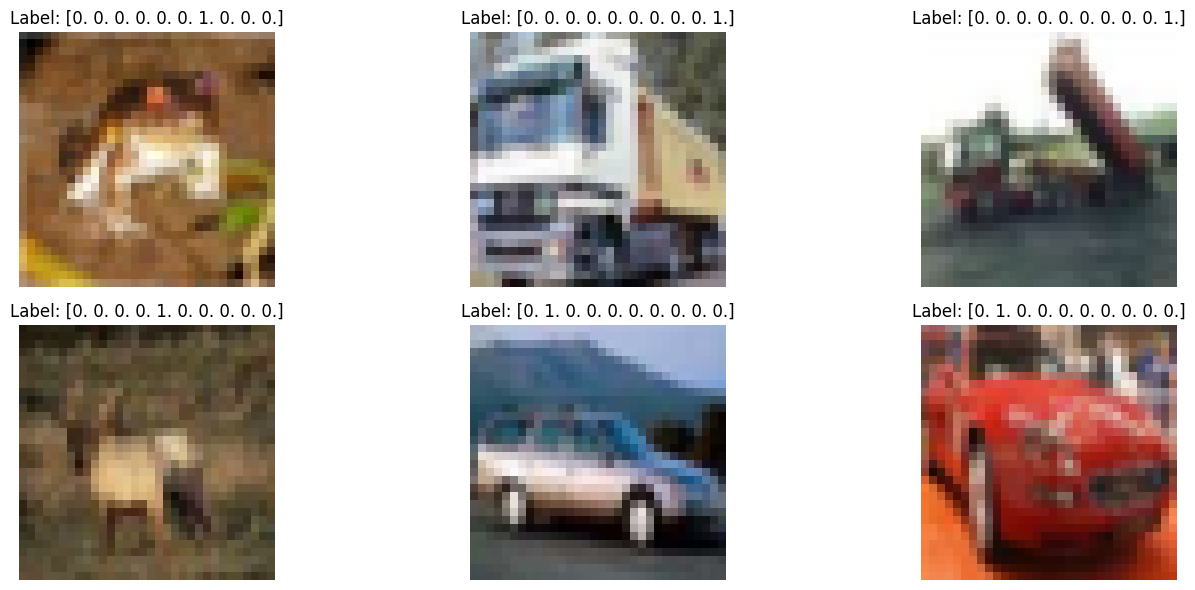

In [7]:
import matplotlib.pyplot as plt

# create a figure and axes with the specified number of rows and columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Loop through the first ten images in the dataset and plot them
for i in range(2 * 3):
  # Plot the image
  axes[i].imshow(x_train[i])
  axes[i].axis('off')
  # Set the title of the subplot
  axes[i].set_title(f'Label: {y_train[i]}')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Feature Scalling

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Model Architecture

In [9]:
model = Sequential()

# Convolutional layer with 32 filters, each of size 3x3
model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
# RelU activation function
model.add(Activation('relu'))
# Batch normalization layer
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Global max pooling layer
model.add(GlobalMaxPooling2D())

# Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

# Fully connected layer with number of units equal to the number of classes
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 22, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 20, 20, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 179,418 (700.85 KB)

 Trainable params: 178,554 (697.48 KB)

 Non-trainable params: 864 (3.38 KB)